In [31]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model,decomposition
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import PolynomialFeatures

In [32]:
carbon_emission = pd.read_excel("transportation_emissions_by_state_per_year_1980-2018.xlsx")

In [33]:
carbon_emission

,Transportation Emissions by State (1980 - 2017),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41
0,million metric tons of carbon dioxide,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Change from 1980 - 2018,NaN
1,State,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,...,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.00,Percent (2011-2018),Absolute (2010-2018
2,Alabama,24.8,24.2,23.5,22.9,23.8,23.5,24.5,26.0,26.3,...,32.3,31.8,31.6,31.6,32.9,34.7,33.9,33.40,0.0340557,1.2
3,Alaska,6.4,7.2,7.3,8.3,10.1,10.9,10.6,9.5,10.7,...,14.2,13.3,12.3,11.7,12.2,11.8,11.6,12.21,-0.140141,-2.69
4,Arizona,18.5,18.7,18.3,18.5,19.6,20.5,21.1,21.9,22.6,...,31.2,30.7,31.1,31.3,31.9,33.0,33.0,34.50,0.105769,3
5,Arkansas,14.3,14.7,14.7,13.7,14.5,14.3,14.7,15.3,16.0,...,19.4,18.7,18.7,19.0,18.8,19.4,19.4,19.93,0.0273196,0.33
6,California,170.9,169.3,160.3,161.8,170.2,169.5,175.2,184.7,195.4,...,201.7,196.8,197.6,200.0,205.6,212.7,217.3,218.33,0.0824492,9.43
7,Colorado,17.7,17.6,18.3,18.0,18.7,19.4,19.6,19.8,19.2,...,28.0,27.9,27.5,28.2,27.9,28.1,28.6,29.72,0.0614286,0.72
8,Connecticut,13.2,12.9,13.2,13.3,13.9,14.0,14.2,14.9,15.4,...,15.5,15.1,15.1,15.1,15.1,15.3,15.2,15.65,0.00967742,-0.05
9,Delaware,3.9,3.7,3.5,4.0,4.1,4.1,4.3,4.7,4.6,...,4.1,4.2,4.1,4.2,4.4,4.6,4.7,4.93,0.202439,0.63


In [34]:
total_emission = carbon_emission.loc[53].tolist()[1:-1]
cali_emissions = carbon_emission.loc[6].tolist()[1:-1]
texas_emissions = carbon_emission.loc[45].tolist()[1:-1]
years = carbon_emission.loc[1].tolist()[1:-1]

In [35]:
total_emission.pop(),years.pop()
for i in range(len(years)):
    years[i] = years[i]-1980.0
years,total_emission

([0.0,
  1.0,
  2.0,
  3.0,
  4.0,
  5.0,
  6.0,
  7.0,
  8.0,
  9.0,
  10.0,
  11.0,
  12.0,
  13.0,
  14.0,
  15.0,
  16.0,
  17.0,
  18.0,
  19.0,
  20.0,
  21.0,
  22.0,
  23.0,
  24.0,
  25.0,
  26.0,
  27.0,
  28.0,
  29.0,
  30.0,
  31.0,
  32.0,
  33.0,
  34.0,
  35.0,
  36.0,
  37.0,
  38.0],
 [1397.8,
  1382.7,
  1350.5,
  1354.3,
  1384.1,
  1414.9,
  1465.1,
  1511.3,
  1571.1,
  1583.1,
  1580.3,
  1559.9,
  1582.9,
  1601.4,
  1641.1,
  1675.7,
  1720.9,
  1739.7,
  1776.4,
  1822.5,
  1866.4,
  1845.5,
  1886.5,
  1886.7,
  1953.2,
  1979.9,
  2008.5,
  2013.7,
  1890.0,
  1824.6,
  1841.6,
  1813.0,
  1778.1,
  1808.1,
  1826.4,
  1851.8,
  1889.6,
  1905.1,
  1949.9899999999996])

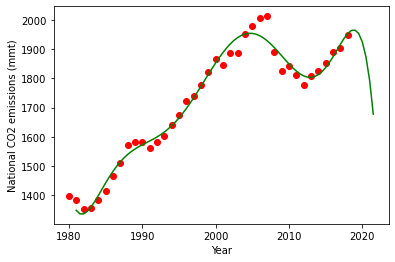

(array([[1422.81282608],
        [1347.12625313],
        [1334.76708578],
        [1357.98611048],
        [1397.52256403],
        [1440.85379684],
        [1480.66616652],
        [1513.53402647],
        [1538.79367364],
        [1557.59912026],
        [1572.14655385],
        [1585.05434988],
        [1598.88550188],
        [1615.79933312],
        [1637.31935452],
        [1664.20413334],
        [1696.40803688],
        [1733.1187159 ],
        [1772.85819212],
        [1813.6344143 ],
        [1853.13014739],
        [1888.91605916],
        [1918.67486893],
        [1940.42342266],
        [1952.71955915],
        [1954.84063151],
        [1946.92054867],
        [1930.03220121],
        [1906.20213603],
        [1878.34434448],
        [1850.10002811],
        [1825.57020688],
        [1808.92803403],
        [1803.89768224],
        [1813.08666546],
        [1837.15846098],
        [1873.83229616],
        [1916.6969642 ],
        [1953.82553371]]),
 array([[ 0.00000000e+0

In [40]:
# Performing polynomial regression for national CO2 emissions

poly_reg=PolynomialFeatures(degree=7)
X_poly = poly_reg.fit_transform(np.array(years).reshape(-1,1))
pol_reg = linear_model.LinearRegression()
pol_reg.fit(X_poly,np.array(total_emission).reshape(-1,1))
pred=pol_reg.predict(X_poly)

year_arr = np.asarray(years)
year_arr += 1980
actual_years = year_arr.tolist()

plt.scatter(actual_years,total_emission,color='red')

years2=np.arange(0,41,0.5)+1
p=pol_reg.predict(poly_reg.fit_transform(years2.reshape(-1,1)))

year2_arr = np.asarray(years2)
year2_arr += 1980
actual_years2 = year2_arr.tolist()

plt.plot(actual_years2,p,color='green')
plt.xlabel('Year')
plt.ylabel('National CO2 emissions (mmt)')
plt.show()
pol_reg.set_params(normalize = True)
pred,pol_reg.coef_,pol_reg.intercept_

In [37]:
gas_prices_national = pd.read_excel("national_gas_prices_by_year_1994-2019.xlsx")
gas_prices_national

,Date,Gas per Galon
0,1993-06-30,NaN
1,1994-06-30,1.078
2,1995-06-30,1.158
3,1996-06-30,1.245
4,1997-06-30,1.244
5,1998-06-30,1.072
6,1999-06-30,1.176
7,2000-06-30,1.523
8,2001-06-30,1.460
9,2002-06-30,1.386


In [38]:
gas_prices= gas_prices_national.iloc[:,1].tolist()[4:25]
gas_prices #list of gas prices from 1997 to 2017

[1.244,
 1.072,
 1.176,
 1.523,
 1.46,
 1.386,
 1.603,
 1.895,
 2.314,
 2.618,
 2.843,
 3.299,
 2.406,
 2.835,
 3.576,
 3.68,
 3.575,
 3.437,
 2.52,
 2.25,
 2.528]

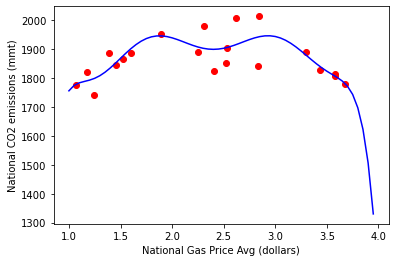

(array([[1798.15453656],
        [1779.12438606],
        [1790.46483024],
        [1876.07013316],
        [1854.34407086],
        [1830.33171947],
        [1902.21868748],
        [1945.77176808],
        [1901.99030327],
        [1915.28491039],
        [1942.7634645 ],
        [1878.98059946],
        [1899.22920659],
        [1942.1279678 ],
        [1807.24458331],
        [1779.68004795],
        [1807.45713721],
        [1838.96995159],
        [1904.51778351],
        [1907.35614241],
        [1905.21777005]]),
 array([[ 0.00000000e+00,  2.64508328e+05, -4.74343842e+05,
          4.68505341e+05, -2.78682169e+05,  1.02389656e+05,
         -2.27444523e+04,  2.80021295e+03, -1.46683614e+02]]),
 array([-60530.6052401]))

In [39]:
# Performing polynomial regression for national gas prices

emission_sample = total_emission[17:38]
poly_reg2=PolynomialFeatures(degree=8)
X_poly_1 = poly_reg2.fit_transform(np.array(gas_prices).reshape(-1,1))
pol_reg2 = linear_model.LinearRegression()
pol_reg2.fit(X_poly_1,np.array(emission_sample).reshape(-1,1))
pred=pol_reg2.predict(X_poly_1)
gp = np.arange(1,4,0.05)
p1=pol_reg2.predict(poly_reg2.fit_transform(gp.reshape(-1,1)))
plt.scatter(gas_prices,emission_sample,color='red')
plt.plot(gp,p1,color='blue')
plt.xlabel('National Gas Price Avg (dollars)')
plt.ylabel('National CO2 emissions (mmt)')
plt.show()
pol_reg.set_params(normalize = True)
pred,pol_reg2.coef_,pol_reg2.intercept_

In [57]:
gas_prices_ca = pd.read_excel("cali_gas_prices_2000-2020.xls")
gas_prices_tx = pd.read_excel("texas_gas_prices_2000-2020.xls")

In [58]:
gas_prices_ca

,Back to Contents,Data 1: Weekly California All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon),Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Sourcekey,EMM_EPM0_PTE_SCA_DPG,NaN,NaN,NaN
1,Date,Weekly California All Grades All Formulations ...,NaN,Year,Average Gas Price
2,2000-05-22 00:00:00,1.679,NaN,2000,1.76822
3,2000-05-29 00:00:00,1.673,NaN,2001,1.6774
4,2000-06-05 00:00:00,1.661,NaN,2002,1.56092
...,...,...,...,...,...
1069,2020-11-02 00:00:00,3.118,NaN,NaN,NaN
1070,2020-11-09 00:00:00,3.114,NaN,NaN,NaN
1071,2020-11-16 00:00:00,3.114,NaN,NaN,NaN
1072,2020-11-23 00:00:00,3.112,NaN,NaN,NaN


In [59]:
gas_prices_ca = gas_prices_ca.iloc[:,4].tolist()[2:20]
gas_prices_tx = gas_prices_tx.iloc[:,4].tolist()[2:20]

In [61]:
gas_prices_ca,gas_prices_tx

([1.7682187500000002,
  1.677396226415094,
  1.5609230769230769,
  1.877903846153846,
  2.1664038461538455,
  2.517211538461538,
  2.854673076923077,
  3.123641509433962,
  3.5607115384615398,
  2.725134615384616,
  3.1381730769230765,
  3.8633846153846148,
  4.080924528301888,
  3.933365384615384,
  3.7935961538461536,
  3.22075,
  2.7820576923076934,
  3.079865384615385],
 [1.4381999999999997,
  1.3243396226415098,
  1.2738846153846155,
  1.4489423076923076,
  1.732519230769231,
  2.1788461538461537,
  2.469096153846154,
  2.6588301886792447,
  3.1181730769230773,
  2.2132499999999995,
  2.6359423076923076,
  3.372,
  3.424867924528302,
  3.318538461538462,
  3.1485192307692307,
  2.170884615384615,
  1.911943396226415,
  2.1851923076923083])

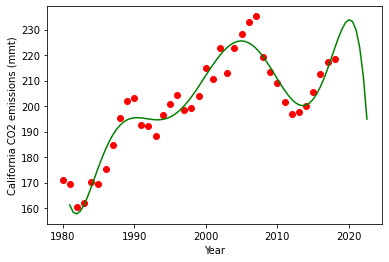

(array([[177.01892959],
        [161.22295042],
        [157.70495728],
        [161.25163796],
        [168.15421338],
        [175.91619325],
        [182.99611607],
        [188.5832962 ],
        [192.40460059],
        [194.56027798],
        [195.38686322],
        [195.34517932],
        [194.93146017],
        [194.60961632],
        [194.76266677],
        [195.66135931],
        [197.44800219],
        [200.13352982],
        [203.60582508],
        [207.64732114],
        [211.9599053 ],
        [216.19514764],
        [219.98787719],
        [222.99112825],
        [224.91047958],
        [225.53580926],
        [224.76848776],
        [222.64203198],
        [219.334243  ],
        [215.16885023],
        [210.60468454],
        [206.21040327],
        [202.62278963],
        [200.48664928],
        [200.37432681],
        [202.68286473],
        [207.50682774],
        [214.48481496],
        [222.61768283]]),
 array([[ 0.00000000e+00, -2.41134383e+01,  9.57100079e+00,
  

In [49]:
#Performing polynomial regression for California CO2 emissions

poly_reg=PolynomialFeatures(degree=7)
X_poly = poly_reg.fit_transform(np.array(years).reshape(-1,1))
pol_reg = linear_model.LinearRegression()
pol_reg.fit(X_poly,np.array(cali_emissions[0:39]).reshape(-1,1))
pred=pol_reg.predict(X_poly)

year_arr = np.asarray(years)
year_arr += 1980
actual_years = year_arr.tolist()

plt.scatter(actual_years,cali_emissions[0:39],color='red')
#plt.plot(years,pred,color='blue')

years2=np.arange(0,42,0.5)+1
p=pol_reg.predict(poly_reg.fit_transform(years2.reshape(-1,1)))

year2_arr = np.asarray(years2)
year2_arr += 1980
actual_years2 = year2_arr.tolist()

plt.plot(actual_years2,p,color='green')
plt.xlabel('Year')
plt.ylabel('California CO2 emissions (mmt)')
plt.show()
pol_reg.set_params(normalize = True)
pred,pol_reg.coef_,pol_reg.intercept_

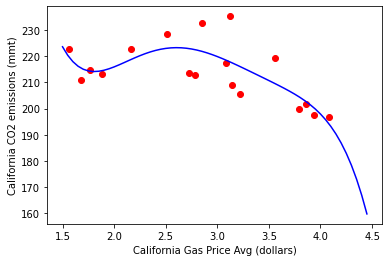

(array([[214.21769073],
        [215.45111542],
        [219.72690683],
        [214.38938794],
        [218.748183  ],
        [223.01478562],
        [221.7675572 ],
        [217.76614042],
        [209.47920064],
        [222.86697712],
        [217.50793698],
        [202.56119849],
        [194.20376055],
        [200.37486584],
        [204.43123963],
        [215.99799775],
        [222.4690909 ],
        [218.52596496]]),
 array([[    0.        , -2742.47692927,  2004.78162671,  -708.02978702,
           121.54457082,    -8.17684606]]),
 array([1662.88776367]))

In [63]:
#Performing polynomial regression for California gas prices

from sklearn.preprocessing import PolynomialFeatures
ca_emission=carbon_emission.loc[6].tolist()[1:-2]
ca_emission_sample = ca_emission[20:38]
poly_reg3=PolynomialFeatures(degree=5)
X_poly_2 = poly_reg3.fit_transform(np.array(gas_prices_ca).reshape(-1,1))
pol_reg3 = linear_model.LinearRegression()
pol_reg3.fit(X_poly_2,np.array(ca_emission_sample).reshape(-1,1))
pred=pol_reg3.predict(X_poly_2)
gp2 = np.arange(1.5,4.5,0.05)
p2=pol_reg3.predict(poly_reg3.fit_transform(gp2.reshape(-1,1)))
plt.scatter(gas_prices_ca,ca_emission_sample,color='red')
plt.plot(gp2,p2,color='blue')
plt.xlabel('California Gas Price Avg (dollars)')
plt.ylabel('California CO2 emissions (mmt)')
plt.show()
pred,pol_reg3.coef_,pol_reg3.intercept_

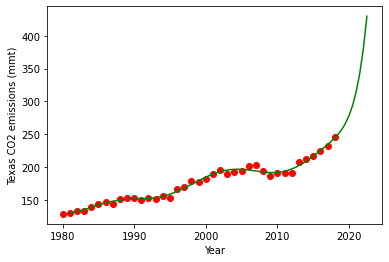

(array([[128.69308515],
        [130.19856531],
        [132.18727389],
        [135.07522156],
        [138.59083595],
        [142.21204973],
        [145.4382655 ],
        [147.93675578],
        [149.59737265],
        [150.52413917],
        [150.98737319],
        [151.35545457],
        [152.02118708],
        [153.33392959],
        [155.54527358],
        [158.77302964],
        [162.98565082],
        [168.00696817],
        [173.53924191],
        [179.20104134],
        [184.57535699],
        [189.26262071],
        [192.93296223],
        [195.37206525],
        [196.51540121],
        [196.46641608],
        [195.49542291],
        [194.01751219],
        [192.54973243],
        [191.65011451],
        [191.84381637],
        [193.54474828],
        [196.98450402],
        [202.16426958],
        [208.84960853],
        [216.6326317 ],
        [225.09104881],
        [234.07897067],
        [244.19008295]]),
 array([[ 0.00000000e+00,  1.69577408e+00, -5.42294572e-01,
  

In [55]:
#Performing polynomial regression for Texas CO2 emissions

poly_reg=PolynomialFeatures(degree=9)
X_poly = poly_reg.fit_transform(np.array(years).reshape(-1,1))
pol_reg = linear_model.LinearRegression()
pol_reg.fit(X_poly,np.array(texas_emissions[0:39]).reshape(-1,1))
pred=pol_reg.predict(X_poly)

year_arr = np.asarray(years)
year_arr += 1980
actual_years = year_arr.tolist()

plt.scatter(actual_years,texas_emissions[0:39],color='red')
#plt.plot(years,pred,color='blue')

years2=np.arange(0,42,0.5)+1
p=pol_reg.predict(poly_reg.fit_transform(years2.reshape(-1,1)))

year2_arr = np.asarray(years2)
year2_arr += 1980
actual_years2 = year2_arr.tolist()

plt.plot(actual_years2,p,color='green')
plt.xlabel('Year')
plt.ylabel('Texas CO2 emissions (mmt)')
plt.show()
pol_reg.set_params(normalize = True)
pred,pol_reg.coef_,pol_reg.intercept_

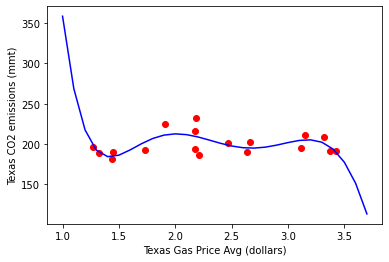

(array([[184.28257823],
        [189.23844904],
        [196.99494509],
        [184.45346181],
        [202.71444916],
        [209.57294175],
        [198.5414786 ],
        [195.00189487],
        [204.81797954],
        [208.39231969],
        [195.12327752],
        [196.83631807],
        [190.51186412],
        [201.20754642],
        [205.19265643],
        [209.82664724],
        [211.42610225],
        [209.36509017]]),
 array([[     0.        , -22313.80021687,  23378.63574116,
         -12525.43369465,   3621.85526107,   -535.77671834,
             31.61108885]]),
 array([8701.20908445]))

In [64]:
#Performing Polynomial regression for Texas gas prices
from sklearn.preprocessing import PolynomialFeatures
tx_emission=carbon_emission.loc[45].tolist()[1:-2]
tx_emission_sample = tx_emission[20:38]
poly_reg_4 = PolynomialFeatures(degree=6)
X_poly_3 = poly_reg_4.fit_transform(np.array(gas_prices_tx).reshape(-1,1))
pol_reg4 = linear_model.LinearRegression()
pol_reg4.fit(X_poly_3,np.array(tx_emission_sample).reshape(-1,1))
pred = pol_reg4.predict(X_poly_3)
gp3 = np.arange(1,3.75,0.1)
p3=pol_reg4.predict(poly_reg_4.fit_transform(gp3.reshape(-1,1)))
plt.scatter(gas_prices_tx,tx_emission_sample,color='red')
plt.plot(gp3,p3,color='blue')
plt.xlabel('Texas Gas Price Avg (dollars)')
plt.ylabel('Texas CO2 emissions (mmt)')
plt.show()
pred,pol_reg4.coef_,pol_reg4.intercept_